In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
output_data_folder = "data/"

### Part 1

In [4]:
pcl_df_train = pd.read_csv(output_data_folder + "pcl_df_train_preprocessed.csv")

In [5]:
pcl_df_train["len_text"] = pcl_df_train["text"].apply(lambda x: len(x.split()))
pcl_df_train["len_text_bin"] = pd.cut(
    pcl_df_train["len_text"], [0, 20, 30, 40, 50, 60, 80, 1000], 
    labels=["0-20", "20-30", "30-40", "40-50", "50-60", "60-80", "80-1000"],
)
pcl_df_train["len_text_bin"] = pcl_df_train["len_text_bin"].astype(str)


In [6]:
pcl_df_train

,par_id,art_id,keyword,country_code,text,label,class,preprocessed_text,len_text,len_text_bin
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0,living time absolute insanity pretty sure peop...,123,80-1000
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0,libya today countless number ghanaian nigerian...,41,40-50
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0,white house press secretary sean spicer said f...,27,20-30
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0,council customer sign would displayed two spac...,30,20-30
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0,like received migrant fleeing el salvador guat...,53,50-60
...,...,...,...,...,...,...,...,...,...,...
8370,4427,@@20738964,disabled,za,A resident writes : I am writing in connection...,0,0,resident writes writing connection terrible ev...,61,60-80
8371,8312,@@8885455,disabled,gh,"The Minister , who is also the Member of Parli...",0,0,minister also member parliament bongo constitu...,65,60-80
8372,1156,@@2897859,poor-families,ca,"Brian Fong , principal at Roywood , says his s...",0,0,brian fong principal roywood say school filled...,74,60-80
8373,3418,@@16885852,immigrant,pk,NEW YORK : Hollywood actress Lindsay Lohan rec...,0,0,new york hollywood actress lindsay lohan recen...,52,50-60


In [7]:
pcl_df_train.groupby("len_text_bin")["class"].value_counts(normalize=True).unstack("class").reset_index()

class,len_text_bin,0,1
0,0-20,0.915436,0.084564
1,20-30,0.933969,0.066031
2,30-40,0.914506,0.085494
3,40-50,0.908965,0.091035
4,50-60,0.878981,0.121019
5,60-80,0.885894,0.114106
6,80-1000,0.881250,0.118750


In [8]:
pcl_df_train.groupby("keyword")["class"].value_counts(normalize=True).unstack("class").reset_index()


class,keyword,0,1
0,disabled,0.919664,0.080336
1,homeless,0.827746,0.172254
2,hopeless,0.875635,0.124365
3,immigrant,0.972716,0.027284
4,in-need,0.832944,0.167056
5,migrant,0.964853,0.035147
6,poor-families,0.844228,0.155772
7,refugee,0.917045,0.082955
8,vulnerable,0.931114,0.068886
9,women,0.954600,0.045400


In [9]:
def plot_dist_by_feat(feature, feature_name):

    # set color palette to "Set2"
    sns.set_palette("Set2")

    # set style to white background without gridlines
    sns.set_style("whitegrid", 
                #   {'axes.grid' : False}
                  )

    df = pcl_df_train.groupby(
        feature
    )["class"].value_counts(normalize=True).unstack("class").reset_index()
    df.columns = [feature, "class_0", "class_1"]
    df.sort_values(by="class_1", ascending=False, inplace=True)

    # plot df in stacked bars with class_0 on bottom and class_1 on top filled to 100%
    ax = df.plot(x=feature, kind="bar", stacked=True, figsize=(10, 5))


    # rotate x axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    ax.set_title(f"Distribution of class labels by {feature_name}", fontsize=20)

    plt.xlabel(feature_name.capitalize(), fontsize=15)
    plt.ylabel('Percentage of class labels', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # move legend so that it doesn't overlap with the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
    plt.show()


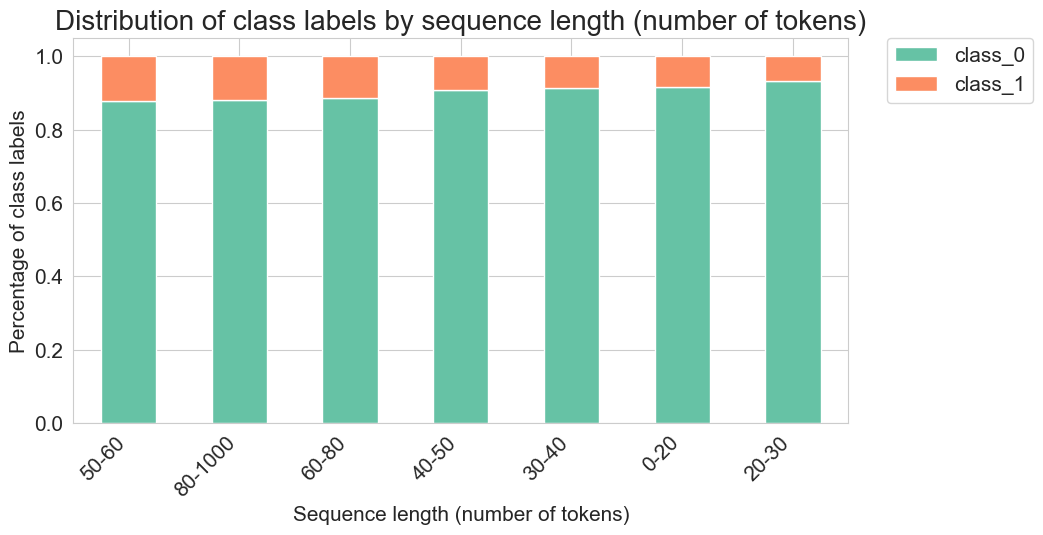

In [10]:
plot_dist_by_feat("len_text_bin", "sequence length (number of tokens)")

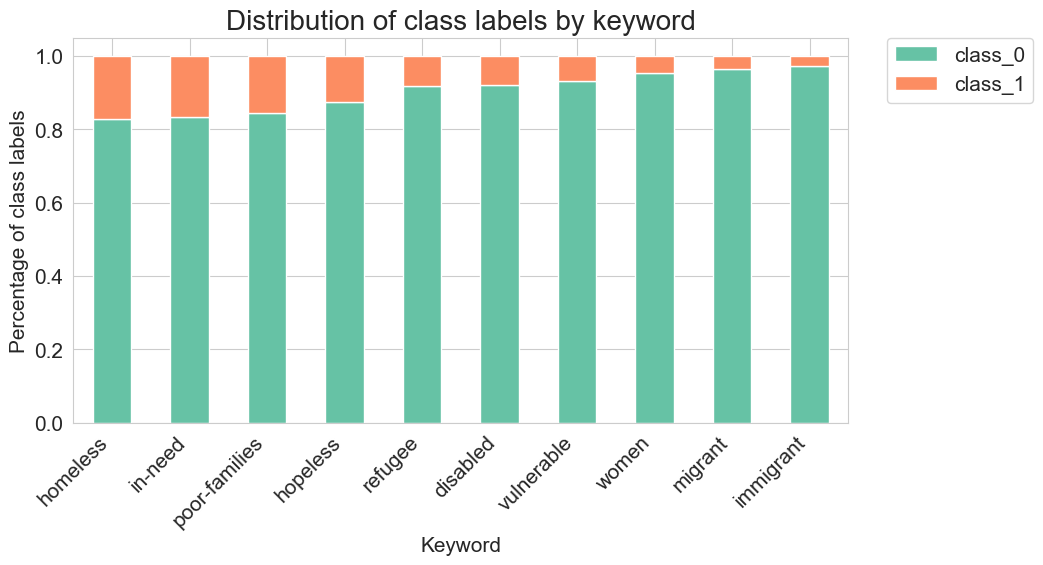

In [11]:
plot_dist_by_feat("keyword", "keyword")

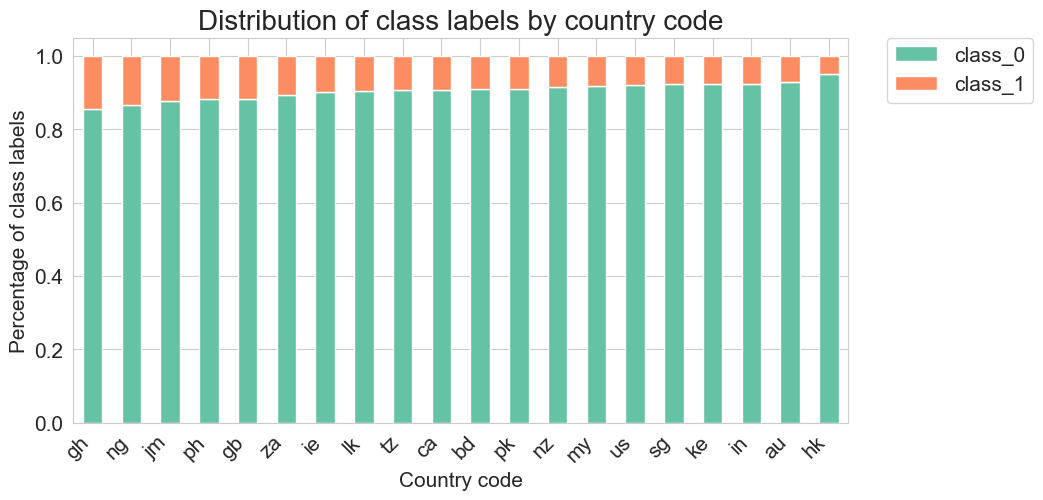

In [12]:
plot_dist_by_feat("country_code", "country code")

### Part 4

In [13]:
df_dev = pd.read_csv(f"{output_data_folder}/pcl_df_dev_w_preds.csv")

In [14]:
df_dev

,par_id,art_id,keyword,country_code,text,label,class,preprocessed_text,len_text,pred_class
0,107,@@16900972,homeless,ke,"""His present """" chambers """" may be quite humbl...",3,1,present chamber may quite humble shiyani tiny ...,75,0
1,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,1,krueger recently harnessed creativity selfpubl...,54,0
2,151,@@19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,1,parent child died must get compensation free m...,25,0
3,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,1,people feel causing problem others breaking ho...,101,1
4,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1,alarmed learn recently circulated proposal wou...,101,0
...,...,...,...,...,...,...,...,...,...,...
2089,10463,@@4676355,refugee,pk,""""""" The Pakistani police came to our house and...",0,0,pakistani police came house told u leave hoji ...,37,0
2090,10464,@@19612634,disabled,ie,"""When Marie O'Donoghue went looking for a spec...",0,0,marie odonoghue went looking special school in...,38,0
2091,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",1,0,sri lankan norm culture inhibit woman taking p...,64,0
2092,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0,added afp continue bank application whole nati...,43,0


### To what extent is the model better at predicting examples with a higher level of patronising content?

In [15]:
df_dev["label"].unique()

array([3, 2, 4, 0, 1])

In [16]:
label_f1_vals = []
label_prec_vals = []
label_rec_vals = []
label_vals = []

for label in [2, 3, 4]:
    labels = df_dev[df_dev["label"] == label]["class"]
    preds = df_dev[df_dev["label"] == label]["pred_class"]
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='binary'
    )
    label_f1_vals.append(f1)
    label_prec_vals.append(precision)
    label_rec_vals.append(recall)
    label_vals.append(label)

Text(0.5, 1.0, 'Scores by Annotator Label')

Text(0.5, 0, 'Annotator Label')

Text(0, 0.5, 'Score')

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

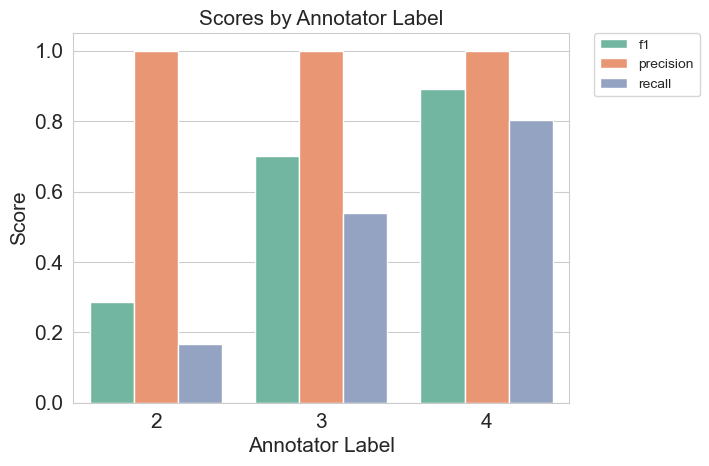

In [17]:
df = pd.DataFrame(
    {
        "label": label_vals,
        "f1": label_f1_vals,
        "precision": label_prec_vals,
        "recall": label_rec_vals,
    }   
)

# set color palette to "Set2"
sns.set_palette("Set2")
# sns.set_theme(style="whitegrid")
ax = sns.barplot(x="label", y="value", hue="variable", data=pd.melt(df, ["label"]))
ax.set_title("Scores by Annotator Label", fontsize=15)
plt.xlabel('Annotator Label', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# move legend so that it doesn't overlap with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



### How does the length of the input sequence impact the model performance? If there is any difference, speculate why.

In [18]:
df_dev["len_text_bin"] = pd.cut(df_dev["len_text"], [0, 20, 30, 40, 50, 60, 80, 300], 
                                labels=[
                                        "0-20", "20-30", "30-40", "40-50", 
                                        "50-60", "60-80", "80-300"
                                        ],
                               )

In [19]:
df_dev["len_text_bin"] = df_dev["len_text_bin"].astype(str)

In [20]:
df_dev["len_text_bin"].dtype

dtype('O')

In [21]:
df_dev["len_text_bin"].value_counts(dropna=False)

30-40     451
20-30     364
40-50     351
60-80     266
50-60     250
80-300    215
0-20      197
Name: len_text_bin, dtype: int64

Text(0.5, 1.0, 'Scores by sentence length (number of tokens)')

Text(0.5, 0, 'Number of tokens')

Text(0, 0.5, 'Score')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-20'),
  Text(1, 0, '20-30'),
  Text(2, 0, '30-40'),
  Text(3, 0, '40-50'),
  Text(4, 0, '50-60'),
  Text(5, 0, '60-80'),
  Text(6, 0, '80-300')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

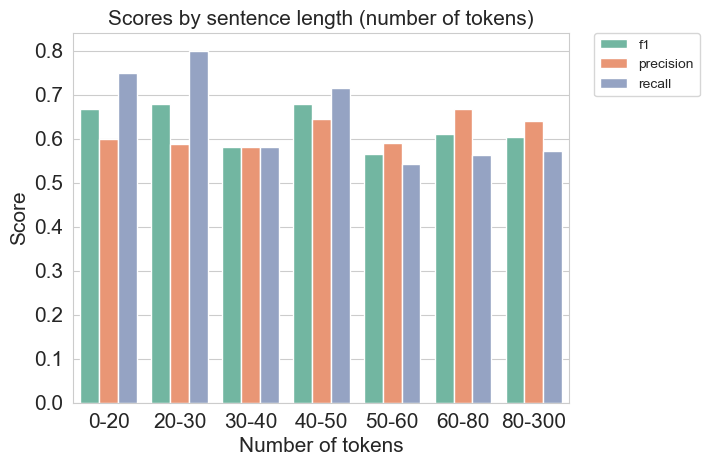

In [22]:
len_f1_vals = []
len_prec_vals = []
len_rec_vals = []
len_vals = []

for length in ['0-20', '20-30', '30-40', '40-50', '50-60', '60-80', '80-300']:
    labels = df_dev[df_dev["len_text_bin"] == length]["class"]
    preds = df_dev[df_dev["len_text_bin"] == length]["pred_class"]
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='binary'
    )
    len_f1_vals.append(f1)
    len_prec_vals.append(precision)
    len_rec_vals.append(recall)
    len_vals.append(length)

df = pd.DataFrame(
    {
        "length": len_vals,
        "f1": len_f1_vals,
        "precision": len_prec_vals,
        "recall": len_rec_vals,
    }
)

# set color palette to "Set2"
sns.set_palette("Set2")
ax = sns.barplot(x="length", y="value", hue="variable", data=pd.melt(df, ["length"]))
ax.set_title("Scores by sentence length (number of tokens)", fontsize=15)
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# move legend so that it doesn't overlap with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### To what extent does model performance depend on the data categories? E.g. Observations for homeless vs poor-families, etc.

Text(0.5, 1.0, 'Scores by Keyword')

Text(0.5, 0, 'Keyword')

Text(0, 0.5, 'Score')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'in-need'),
  Text(1, 0, 'homeless'),
  Text(2, 0, 'vulnerable'),
  Text(3, 0, 'hopeless'),
  Text(4, 0, 'poor-families'),
  Text(5, 0, 'disabled'),
  Text(6, 0, 'refugee'),
  Text(7, 0, 'migrant'),
  Text(8, 0, 'immigrant'),
  Text(9, 0, 'women')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

[Text(0, 0, 'in-need'),
 Text(1, 0, 'homeless'),
 Text(2, 0, 'vulnerable'),
 Text(3, 0, 'hopeless'),
 Text(4, 0, 'poor-families'),
 Text(5, 0, 'disabled'),
 Text(6, 0, 'refugee'),
 Text(7, 0, 'migrant'),
 Text(8, 0, 'immigrant'),
 Text(9, 0, 'women')]

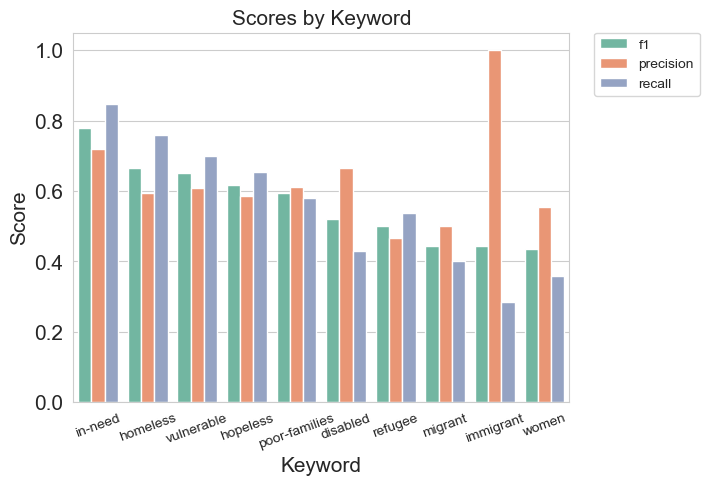

In [23]:
kw_f1_vals = []
kw_prec_vals = []
kw_rec_vals = []
kw_vals = []

for keyword in list(df_dev['keyword'].unique()):
    labels = df_dev[df_dev["keyword"] == keyword]["class"]
    preds = df_dev[df_dev["keyword"] == keyword]["pred_class"]
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='binary'
    )
    kw_f1_vals.append(f1)
    kw_prec_vals.append(precision)
    kw_rec_vals.append(recall)
    kw_vals.append(keyword)

# plot f1, precision, recall for each label in a single plot usiing seaborn

df = pd.DataFrame(
    {
        "keyword": kw_vals,
        "f1": kw_f1_vals,
        "precision": kw_prec_vals,
        "recall": kw_rec_vals,
    }   
)

# sort df by f1 score
df = df.sort_values(by='f1', ascending=False)

# set color palette to "Set2"
sns.set_palette("Set2")
ax = sns.barplot(
    x="keyword", y="value", hue="variable", data=pd.melt(df, ["keyword"]))
ax.set_title("Scores by Keyword", fontsize=15)
plt.xlabel('Keyword', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
# move legend so that it doesn't overlap with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [27]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.arange(len(label_vals))  # the label locations
# width = 0.25  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width, label_f1_vals, width, label='F1')
# rects2 = ax.bar(x, label_prec_vals, width, label='Precision')
# rects3 = ax.bar(x + width, label_rec_vals, width, label='Recall')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by label')
# ax.set_xticks(x)
# ax.set_xticklabels(label_vals)
# ax.legend()

# # set colour map to "Set2"
# ax.set_prop_cycle('color', plt.cm.Set2.colors)

# fig.tight_layout()

# plt.show()

In [ ]:
# # set color palette to "Set2"
# sns.set_palette("Set2")
# # sns.set_theme(style="whitegrid")
# ax = sns.barplot(x="label", y="value", hue="variable", data=pd.melt(df, ["label"]))
# ax.set_title("Scores by Annotator Label", fontsize=15)
# plt.xlabel('Annotator Label', fontsize=15)
# plt.ylabel('Score', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# # move legend so that it doesn't overlap with the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()



# # set color palette to "Set2"
# plt.figure(figsize=(10, 8))
# sns.set_palette("Set2")
# # sns.set_theme(style="whitegrid")
# ax = sns.barplot(x="label", y="value", hue="variable", data=pd.melt(df, ["label"]))
# ax.set_title("Scores by annotator label")
# ax.set_xlabel("Annotator label")
# ax.set_ylabel("Score")
# # move legend outside of plot
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# # set title and labels font size
# ax.title.set_fontsize(15)
# ax.xaxis.label.set_fontsize(15)
# ax.yaxis.label.set_fontsize(15)
# # set tick labels font size
# ax.tick_params(labelsize=15)
# # set legend font size
# ax.legend(fontsize=15)

# plt.show()